In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('data/BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
data['rm'].fillna(data['rm'].mean(),inplace=True)
# data.dropna(axis=0,inplace=True)

In [5]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
x = data.iloc[:,:-1]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [7]:
y = data.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [8]:
# Linear Regression .....  
# 1. Importing the libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression 

In [9]:
reg = LinearRegression()

mse = cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=5)

print(mse)

print(np.mean(mse))

[-12.73088976 -26.07184123 -33.28531564 -80.67139716 -33.34979626]
-37.221848010620484


In [10]:
# reg.fit(x,y)
# reg.predict([[36.2]])

In [11]:
# Ridge Regression 
from sklearn.linear_model import Ridge,Lasso 
from sklearn.model_selection import GridSearchCV

In [12]:
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,30,40,50,60,70,80,90,100]}

In [13]:
ridge = Ridge() 

In [14]:
ridge_reg = GridSearchCV(ridge,para,scoring='neg_mean_squared_error',cv=5)

In [15]:
ridge_reg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 30,
                                   40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [16]:
ridge_reg.best_params_

{'alpha': 100}

In [17]:
ridge_reg.best_score_

-29.957617949695088

In [18]:
ridge_reg.best_estimator_

Ridge(alpha=100)

In [19]:
ridge_reg.best_index_

14

In [20]:
lasso = Lasso()

In [21]:
lasso_reg = GridSearchCV(lasso,para,scoring='neg_mean_squared_error',cv=5)

In [22]:
lasso_reg.fit(x,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.845e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.336e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 30,
                                   40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [23]:
lasso_reg.best_score_

-35.56424895030391

In [24]:
lasso_reg.best_params_

{'alpha': 1}

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [26]:
mse = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

print(np.mean(mse))

-25.211462160002924


In [27]:
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 30,
                                   40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [28]:
ridge_reg.best_params_

{'alpha': 0.01}

In [29]:
ridge_reg.best_score_

-25.21048602416213

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


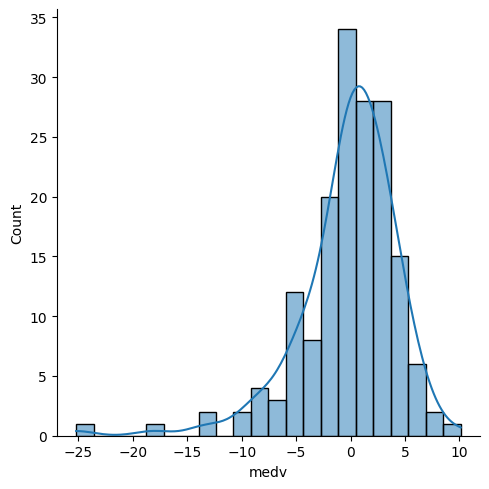

In [30]:
sns.displot(ridge_reg.predict(X_test)-y_test,kde=True)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


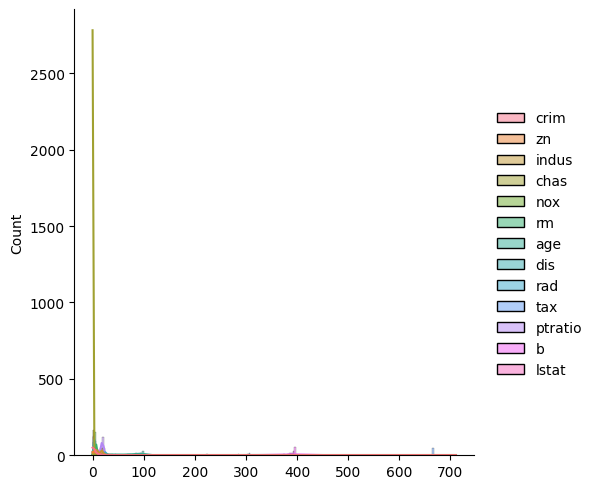

In [31]:
sns.displot(X_test,kde=True)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(ridge_reg.predict(X_test),y_test)

0.6691283830199197

In [34]:
lasso_reg = GridSearchCV(lasso,para,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.671e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 30,
                                   40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [35]:
lasso_reg.best_score_

-25.211462160003197

In [36]:
lasso_reg.best_params_

{'alpha': 1e-15}

In [37]:
r2_score(lasso_reg.predict(X_test),y_test)

0.6692084503563057

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


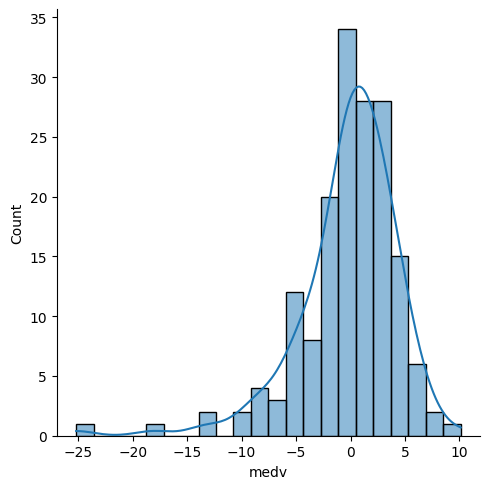

In [38]:
sns.displot(lasso_reg.predict(X_test)-y_test,kde=True)

In [39]:
r2_score(lasso_reg.predict(X_test),y_test)

0.6692084503563057

In [40]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [41]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [42]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [43]:
# Dependent Feature 
Y = pd.DataFrame(data['target'],columns=['Target'])
Y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [44]:
Y['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
para = [{'C':[1,5,10]},{'max_iter':[100,150]}]

lr = LogisticRegression(C=100,max_iter=100)

In [47]:
model = GridSearchCV(lr,param_grid=para,scoring='f1',cv=5)

In [48]:
model.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (statu

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [49]:
model.best_params_

{'max_iter': 150}

In [50]:
model.best_score_

0.9670436171927532

In [51]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [52]:
pre = model.predict(X_test)

In [53]:
# sns.displot(model.predict(X_test)-y_test,kde=True)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_absolute_error,mean_squared_error

In [54]:
confusion_matrix(y_test,pre)

array([[39,  4],
       [ 1, 70]], dtype=int64)

In [55]:
confusion_matrix(pre,y_test)

array([[39,  1],
       [ 4, 70]], dtype=int64)

In [56]:
accuracy_score(y_test,pre)

0.956140350877193

In [57]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [58]:
data = pd.read_csv('data/PlayTennis.csv')
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [59]:
data.outlook.unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder 

In [61]:
le = LabelEncoder()

In [62]:
outlook = LabelEncoder()
temp = LabelEncoder()
humidity = LabelEncoder()
windy = LabelEncoder()
play = LabelEncoder()

data['outlook'] = outlook.fit_transform(data['outlook'])
data['temp'] = temp.fit_transform(data['temp'])
data['humidity'] = humidity.fit_transform(data['humidity'])
data['windy'] = windy.fit_transform(data['windy'])
data['play'] = play.fit_transform(data['play'])

In [63]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [64]:
x = data.iloc[:,0:4]
x

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [65]:
y = data.iloc[:,4]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model = GaussianNB()

In [69]:
model.fit(x_train,y_train)

GaussianNB()

In [70]:
model.predict(x_test)

array([0, 1, 0])

In [71]:
x_test

,outlook,temp,humidity,windy
8,2,0,1,0
6,0,0,1,1
4,1,0,1,0


In [72]:
model.predict([[2,0,1,0]])


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [73]:
model.predict([[1,0,1,0]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [74]:
model.predict([[1,1,1,0]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [75]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
x = data.iloc[:,0:4]
y = data.iloc[:,4]

In [78]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
regree = DecisionTreeClassifier()
# regree.fit(x_train,y_train)


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [79]:
regree.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

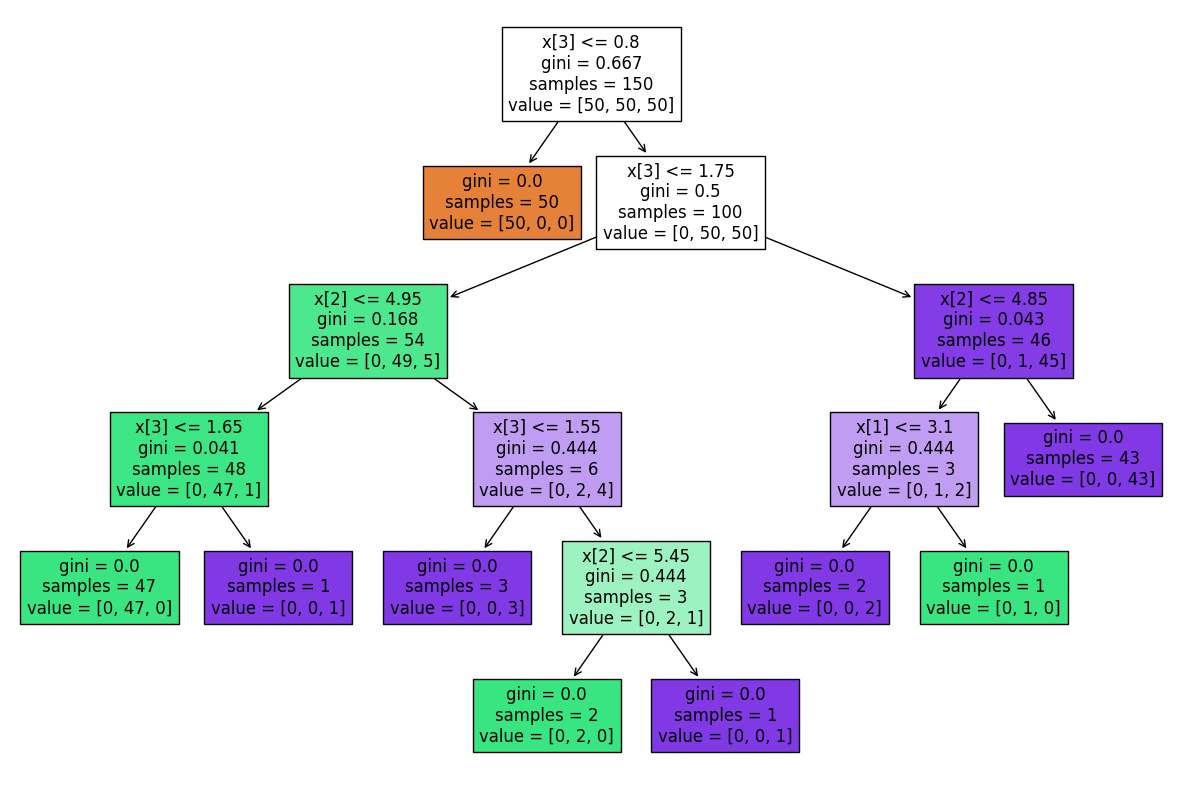

In [81]:
plt.figure(figsize=(15,10))
tree.plot_tree(regree,filled=True)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
import pandas as pd 
import numpy as np
%matplotlib inline

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [6]:
X,y = make_blobs(n_samples=500, # 1000
                 n_features=2,
                 centers=4, # 3
                 cluster_std=1.0,
                 center_box=(-10.0, 10.0),
                 shuffle=True,
                 random_state=23) # For Reproducibility 
range_n_clusters = [2,3,4,5,6]

In [7]:
X

array([[ 3.95582967e+00, -5.17959812e+00],
       [-7.25197745e+00, -2.00763586e+00],
       [-6.43805781e+00,  2.46531043e+00],
       [ 4.07075303e+00, -5.12927096e+00],
       [-6.65725368e+00, -1.57318863e+00],
       [ 5.14666036e+00, -3.75620618e+00],
       [-9.86905816e-01,  1.05766433e+01],
       [-6.23593624e+00,  3.70302183e+00],
       [ 2.19851642e-01,  9.30656694e+00],
       [ 5.96694229e-01,  8.12563583e+00],
       [ 5.19591322e-01,  7.71599730e+00],
       [ 4.61788554e-01,  9.60434729e+00],
       [-4.26858352e+00,  2.05899354e+00],
       [-8.45295897e+00, -8.32692439e-01],
       [-6.79728709e+00,  4.20040609e+00],
       [-7.84176527e+00, -3.87624037e+00],
       [ 5.47473881e+00, -4.51059951e+00],
       [-6.01264770e-01,  7.67767587e+00],
       [-5.14656204e-01,  8.68062006e+00],
       [-4.71618713e+00,  3.48565376e+00],
       [ 8.94745751e-01,  8.32411710e+00],
       [-4.97177607e+00,  2.57516373e+00],
       [ 1.48409387e+00,  9.24179415e+00],
       [-7.

In [8]:
y

array([1, 3, 2, 1, 3, 1, 0, 2, 0, 0, 0, 0, 2, 3, 2, 3, 1, 0, 0, 2, 0, 2,
       0, 3, 2, 3, 0, 3, 0, 1, 0, 0, 0, 0, 1, 2, 3, 3, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 3, 3, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 3,
       2, 2, 2, 3, 0, 3, 2, 2, 0, 1, 1, 3, 2, 0, 3, 0, 3, 0, 3, 1, 3, 3,
       1, 0, 3, 1, 0, 0, 2, 0, 1, 2, 3, 2, 2, 0, 3, 2, 3, 1, 1, 2, 1, 3,
       3, 0, 3, 3, 2, 0, 0, 1, 0, 3, 1, 2, 2, 1, 3, 2, 0, 3, 3, 1, 1, 0,
       2, 3, 3, 1, 1, 1, 1, 3, 0, 2, 1, 1, 3, 0, 3, 2, 2, 3, 3, 0, 3, 3,
       0, 1, 0, 2, 3, 1, 1, 2, 2, 3, 1, 3, 1, 1, 3, 2, 3, 2, 3, 1, 1, 0,
       3, 3, 2, 0, 2, 1, 3, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 3,
       1, 3, 0, 2, 3, 3, 0, 3, 3, 1, 2, 2, 0, 3, 3, 2, 1, 0, 2, 2, 0, 3,
       1, 3, 1, 2, 0, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 0, 3, 1, 2, 2, 3, 2,
       0, 3, 3, 0, 0, 1, 3, 2, 2, 3, 1, 3, 1, 3, 1, 3, 0, 0, 0, 2, 2, 1,
       3, 1, 2, 1, 0, 0, 3, 2, 0, 1, 0, 1, 1, 3, 1, 0, 3, 1, 2, 0, 0, 1,
       1, 3, 2, 1, 3, 3, 0, 0, 2, 0, 2, 1, 0, 2, 1,

In [9]:
# List to store sum of squared errors for each k
sse = []

# Iterate through different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0).fit(X)
    sse.append(kmeans.inertia_)


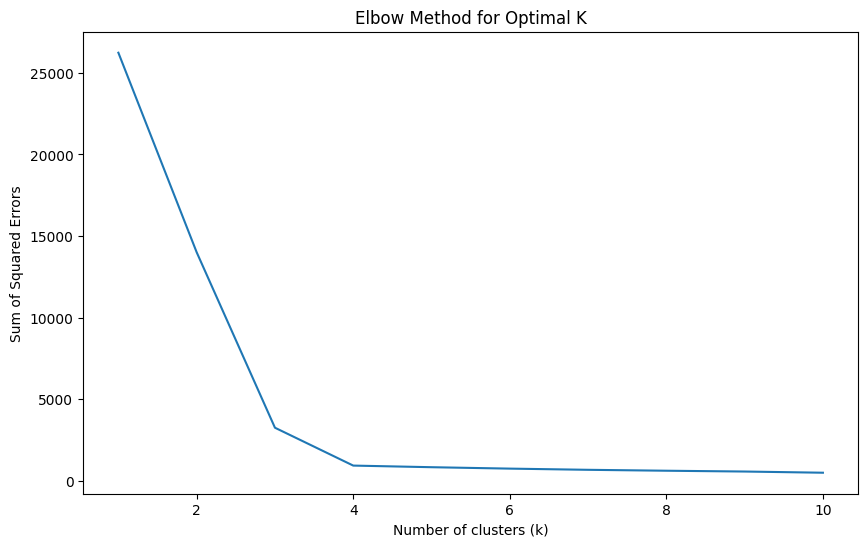

In [10]:
# Plot the sum of squared errors for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal K')
plt.show()

In [12]:
cluster = KMeans(n_clusters = 4,random_state = 10)
cluster_label = cluster.fit_predict(X)
cluster_label

array([2, 1, 1, 2, 1, 2, 3, 1, 3, 0, 0, 3, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1,
       3, 1, 1, 1, 3, 1, 0, 2, 0, 3, 3, 0, 2, 1, 1, 1, 3, 1, 3, 3, 1, 1,
       0, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 1, 3, 1, 2, 1, 1,
       2, 0, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 3, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       3, 2, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 3,
       1, 1, 1, 3, 1, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3, 1, 0, 2, 1, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 0, 1,
       2, 1, 2, 1, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 3, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 0, 0, 1, 1, 2,
       1, 2, 1, 2, 0, 3, 1, 1, 3, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0, 3, 2,
       2, 1, 1, 2, 1, 1, 3, 0, 0, 0, 1, 2, 3, 1, 2,

In [16]:
# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)
    
#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", n_clusters,
#         "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                         0, ith_cluster_silhouette_values,facecolor =color,edgecolor =color,alpha=0.7)
        
#         #Label the  Silhoutte Plot with their cluster numbers at the 
#         #bottom of the plot
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i,str(i))
        
#         # Compute The new y_lower for next plot 
#         y_lower = y_upper + 10  # 10 for the 0 samples
        
#         ax1.set_ylim([0, len(X) + (n_clusters + 1) *10])
#         ax1.set_title("The silhouette plot for the various clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")
        
#         #the vertical line for average 
#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        


In [19]:
for n_clusters in range_n_clusters:
    # Initialize the KMeans clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculate silhouette score and print results
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # The y_lower variable keeps track of the current vertical position
    y_lower = 10

    # Create silhouette plot for each cluster
    for i in range(n_clusters):
        # Get silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # Color for the cluster
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Plot the silhouette for cluster i
        ax1.fill_betweenx(
            np.arange(y_lower, y_lower + size_cluster_i),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plot with cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update y_lower for the next plot
        y_lower = y_lower + size_cluster_i + 10  # Add space between clusters

    # Configure the silhouette plot (applicable to all clusters)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Plot the vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average")

    # Optional: Plot the predicted cluster assignments on the second subplot (ax2)
    ax2.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', label=f"{n_clusters} clusters")

    # Clear the plot for the next iteration (optional)
    # ax1.cla()  # Uncomment to clear silhouette plot for each iteration

# Add legend for the second subplot (optional)
if len(ax2.get_legend_handles_labels()) > 1:  # Check if there are multiple plots in ax2
    ax2.legend()

plt.tight_layout()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.551191604619592
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 5 The average silhouette_score is : 0.4898982472843944
For n_clusters = 6 The average silhouette_score is : 0.4771175005821336
For n_clusters = 7 The average silhouette_score is : 0.34888772990636424


<Figure size 640x480 with 0 Axes>

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.551191604619592
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 5 The average silhouette_score is : 0.4898982472843944
For n_clusters = 6 The average silhouette_score is : 0.4771175005821336
For n_clusters = 7 The average silhouette_score is : 0.34888772990636424


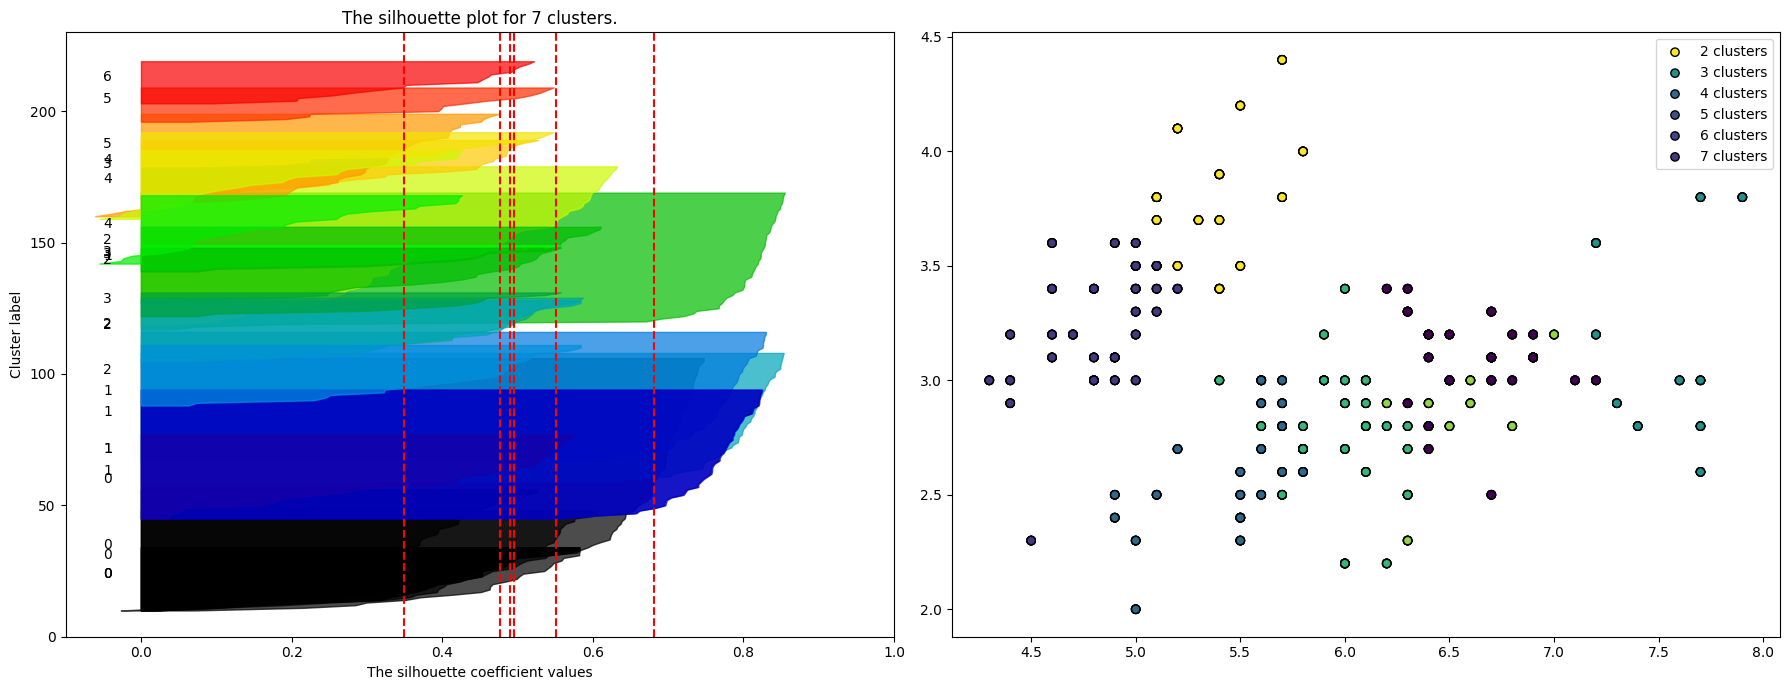

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
from matplotlib import cm

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target  # True cluster labels

# Define the range of number of clusters to explore
range_n_clusters = range(2, 8)  # Try from 2 to 7 clusters

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

for n_clusters in range_n_clusters:
    # Initialize the KMeans clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculate silhouette score and print results
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # The y_lower variable keeps track of the current vertical position
    y_lower = 10

    # Create silhouette plot for each cluster
    for i in range(n_clusters):
        # Get silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # Color for the cluster
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Plot the silhouette for cluster i
        ax1.fill_betweenx(
            np.arange(y_lower, y_lower + size_cluster_i),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plot with cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update y_lower for the next plot
        y_lower = y_lower + size_cluster_i + 10  # Add space between clusters

    # Configure the silhouette plot (applicable to all clusters)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Plot the vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average")

    # Optional: Plot the predicted cluster assignments on the second subplot (ax2)
    ax2.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', label=f"{n_clusters} clusters")

    # Clear the plot for the next iteration (optional)
    # ax1.cla()  # Uncomment to clear silhouette plot for each iteration

# Add legend for the second subplot (optional)
if len(ax2.get_legend_handles_labels()) > 1:  # Check if there are multiple plots in ax2
    ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# # The 2nd subplot is the silhouette plot
    # # The silhouette coefficient can range from -1, 1 but in this example all
    # # lie within [-0.1, 1]
    # ax2.set_xlim([-0.1, 1])
    # # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # # plots of individual clusters, to demarcate them clearly.
    
    
    
    
# ax1.set_ylim([0, len(X) + (n_clusters + 1) *10])
# ax1.set_title("The silhouette plot for the various clusters.")
# ax1.set_xlabel("The silhouette coefficient values")
# ax1.set_ylabel("Cluster label")

In [ ]:
# Create a subplot with 1 row and 2 columns 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

